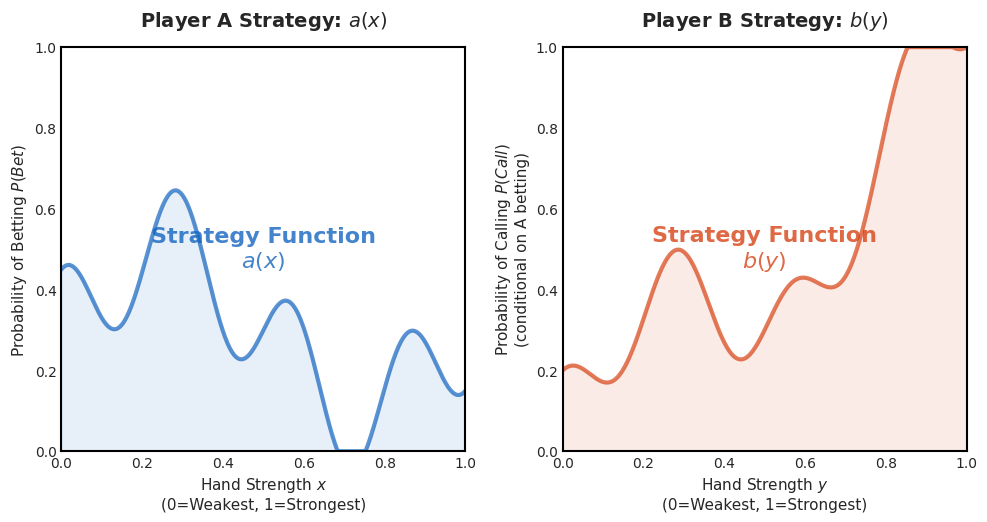

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 設定繪圖風格
# ==========================================
plt.style.use('seaborn-v0_8-white')

# 準備數據
x = np.linspace(0, 1, 500)

# 產生示意用的「波浪」函數 (維持原本的形狀)
np.random.seed(42) 
wavy_a = np.clip(0.3 + 0.2 * np.sin(2 * np.pi * x) + 0.15 * np.cos(7 * np.pi * x), 0.0, 1.0)
wavy_b = np.clip(0.2 + 0.8 * x**2 - 0.2 * np.sin(5 * np.pi * x) * np.sin(2 * np.pi * x) + 0.1 * np.sin(3 * np.pi * x), 0.0, 1.0)

# 建立畫布
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# =========================================
# 左圖：Player A (Betting Strategy)
# =========================================
ax1 = axes[0]
ax1.plot(x, wavy_a, color='#1565C0', lw=3, alpha=0.7)
ax1.fill_between(x, 0, wavy_a, color='#1565C0', alpha=0.1)

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_aspect('equal', adjustable='box')

ax1.set_title("Player A Strategy: $a(x)$", fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel("Hand Strength $x$\n(0=Weakest, 1=Strongest)", fontsize=11)
ax1.set_ylabel("Probability of Betting $P(Bet)$", fontsize=11)

# 中間文字
ax1.text(0.5, 0.5, "Strategy Function\n$a(x)$", fontsize=16, color='#1565C0',
         ha='center', va='center', fontweight='bold', alpha=0.8)

# 畫框框
for spine in ax1.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# =========================================
# 右圖：Player B (Calling Strategy)
# =========================================
ax2 = axes[1]
ax2.plot(x, wavy_b, color='#D84315', lw=3, alpha=0.7)
ax2.fill_between(x, 0, wavy_b, color='#D84315', alpha=0.1)

ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.set_aspect('equal', adjustable='box')

ax2.set_title("Player B Strategy: $b(y)$", fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel("Hand Strength $y$\n(0=Weakest, 1=Strongest)", fontsize=11)
ax2.set_ylabel("Probability of Calling $P(Call)$\n(conditional on A betting)", fontsize=11)

# 中間文字
ax2.text(0.5, 0.5, "Strategy Function\n$b(y)$", fontsize=16, color='#D84315',
         ha='center', va='center', fontweight='bold', alpha=0.8)

# 畫框框
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

plt.tight_layout()
import os
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/strategy_functions.png', dpi=300, bbox_inches='tight')
plt.show()

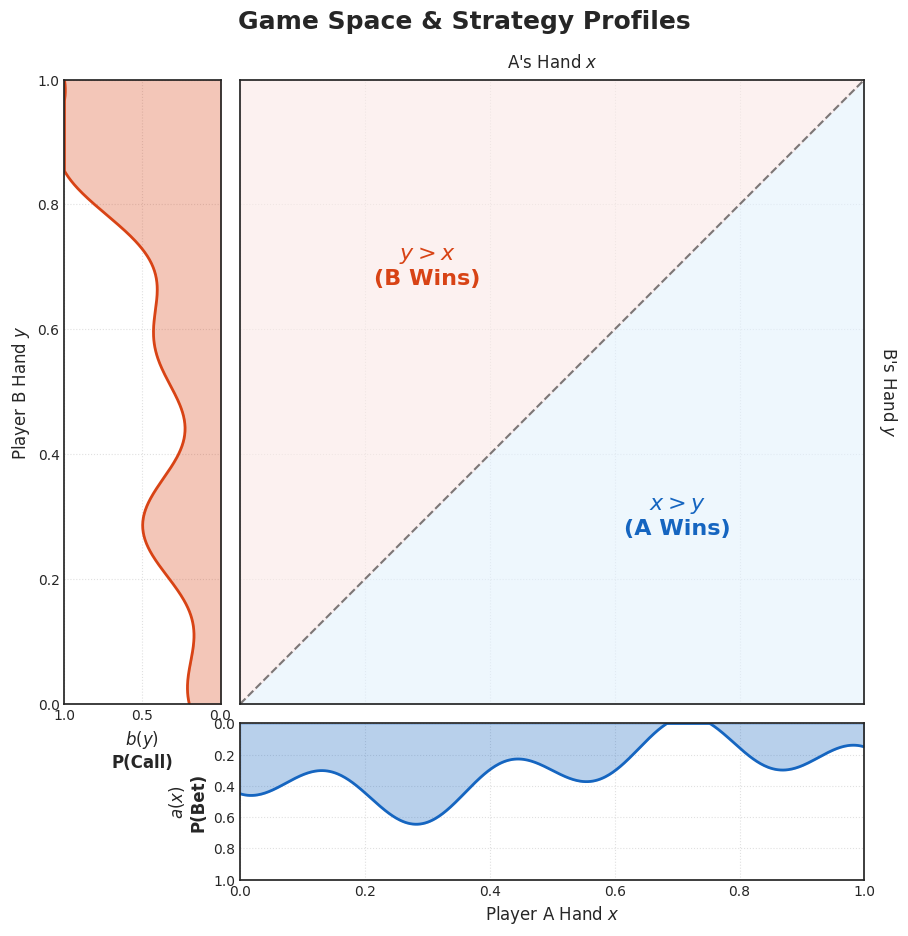

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# 參數與風格設定
# ==========================================
plt.style.use('seaborn-v0_8-white')

# 準備數據
t = np.linspace(0, 1, 500)

# 產生示意用的策略函數 (沿用之前的波浪函數)
np.random.seed(42)
# a(x): Player A 在拿到牌 x 時的下注機率
# strategy_a = np.clip(0.5 + 0.3 * np.sin(3 * np.pi * t) + 0.15 * np.cos(7 * np.pi * t), 0, 1)
strategy_a = np.clip(0.3 + 0.2 * np.sin(2 * np.pi * t) + 0.15 * np.cos(7 * np.pi * t), 0.0, 1.0)
# b(y): Player B 在拿到牌 y 時的跟注機率
# strategy_b = np.clip(0.2 + 0.8 * t**2 - 0.2 * np.sin(5 * np.pi * t), 0, 1)
strategy_b = np.clip(0.2 + 0.8 * t**2 - 0.2 * np.sin(5 * np.pi * t) * np.sin(2 * np.pi * t) + 0.1 * np.sin(3 * np.pi * t), 0.0, 1.0)


# ==========================================
# 建立畫布與 GridSpec 佈局
# ==========================================
fig = plt.figure(figsize=(10, 10))

# 定義 2x2 的網格
# width_ratios=[1, 4]: 左邊的圖寬度 1，主圖寬度 4
# height_ratios=[4, 1]: 主圖高度 4，下面的圖高度 1
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# 定義三個子圖的位置
ax_main = fig.add_subplot(gs[0, 1])  # 右上：主圖 (x, y) 空間
ax_left = fig.add_subplot(gs[0, 0], sharey=ax_main) # 左上：Player B 策略
ax_bottom = fig.add_subplot(gs[1, 1], sharex=ax_main) # 右下：Player A 策略

# ==========================================
# 1. 繪製主圖 (右上)：單位正方形與勝負區域
# ==========================================
# 畫對角線 x=y
ax_main.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.5)

# 填色區塊
# 下三角形 (x > y): A 的牌比較大
ax_main.fill_between([0, 1], [0, 1], 0, color='#E3F2FD', alpha=0.6) # 淺藍
ax_main.text(0.7, 0.3, "$x > y$\n(A Wins)", fontsize=16, ha='center', va='center', color='#1565C0', fontweight='bold')

# 上三角形 (y > x): B 的牌比較大
ax_main.fill_between([0, 1], [0, 1], 1, color='#FBE9E7', alpha=0.6) # 淺紅
ax_main.text(0.3, 0.7, "$y > x$\n(B Wins)", fontsize=16, ha='center', va='center', color='#D84315', fontweight='bold')

# 設定範圍與標籤
ax_main.set_xlim(0, 1)
ax_main.set_ylim(0, 1)
ax_main.set_aspect('equal') # 確保是正方形
ax_main.grid(True, linestyle=':', alpha=0.6)

# 隱藏主圖左邊和下面的刻度數字 (因為要跟旁邊的圖共用)
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_main.get_yticklabels(), visible=False)

# 標註軸意義
ax_main.text(1.02, 0.5, "B's Hand $y$", rotation=270, va='center', fontsize=12)
ax_main.text(0.5, 1.02, "A's Hand $x$", ha='center', fontsize=12)


# ==========================================
# 2. 繪製左圖 (左上)：Player B 策略 b(y)
# ==========================================
# 注意：這裡是 (機率, y)，我們要讓機率往左邊長，所以 x 軸要反轉
ax_left.plot(strategy_b, t, color='#D84315', linewidth=2)
ax_left.fill_betweenx(t, 0, strategy_b, color='#D84315', alpha=0.3)

# 設定範圍
ax_left.set_xlim(1, 0) # 【關鍵】反轉 X 軸：1 在左邊，0 在右邊 (貼著主圖)
ax_left.set_ylim(0, 1)
ax_left.grid(True, linestyle=':', alpha=0.6)

# 標籤
ax_left.set_xlabel("$b(y)$\nP(Call)", fontsize=12, fontweight='bold')
ax_left.set_ylabel("Player B Hand $y$", fontsize=12)

# ==========================================
# 3. 繪製下圖 (右下)：Player A 策略 a(x)
# ==========================================
# 注意：這裡是 (x, 機率)，我們要讓機率往下長，所以 y 軸要反轉
ax_bottom.plot(t, strategy_a, color='#1565C0', linewidth=2)
ax_bottom.fill_between(t, 0, strategy_a, color='#1565C0', alpha=0.3)

# 設定範圍
ax_bottom.set_xlim(0, 1)
ax_bottom.set_ylim(1, 0) # 【關鍵】反轉 Y 軸：1 在下面，0 在上面 (貼著主圖)
ax_bottom.grid(True, linestyle=':', alpha=0.6)

# 標籤
ax_bottom.set_ylabel("$a(x)$\nP(Bet)", fontsize=12, fontweight='bold')
ax_bottom.set_xlabel("Player A Hand $x$", fontsize=12)

# ==========================================
# 整體調整
# ==========================================
plt.suptitle("Game Space & Strategy Profiles", fontsize=18, y=0.97, fontweight='bold')
# 不需要 tight_layout，因為 GridSpec 已經手動控制好了
import os
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/game_space.png', dpi=300, bbox_inches='tight')
plt.show()

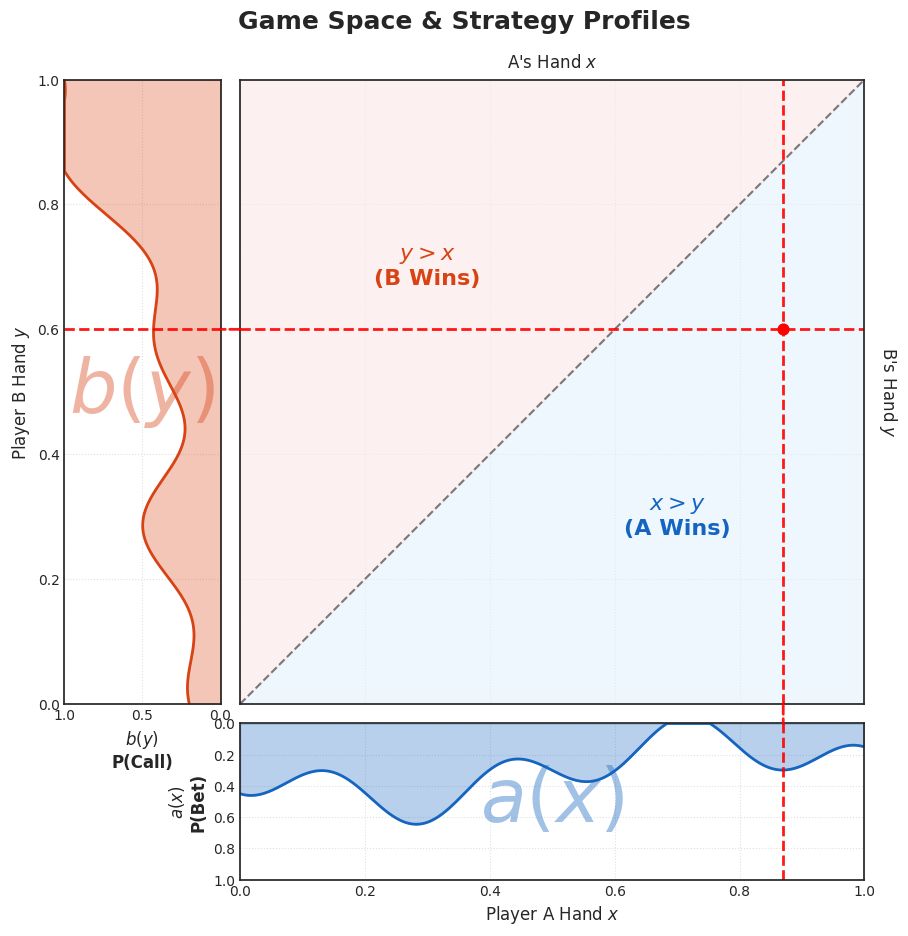

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch # <--- 新增這個 import

# ==========================================
# 參數與風格設定
# ==========================================
plt.style.use('seaborn-v0_8-white')

# 準備數據
t = np.linspace(0, 1, 500)

# 產生示意用的策略函數 (沿用你的波浪函數)
np.random.seed(42)
# a(x): Player A 在拿到牌 x 時的下注機率
strategy_a = np.clip(0.3 + 0.2 * np.sin(2 * np.pi * t) + 0.15 * np.cos(7 * np.pi * t), 0.0, 1.0)
# b(y): Player B 在拿到牌 y 時的跟注機率
strategy_b = np.clip(0.2 + 0.8 * t**2 - 0.2 * np.sin(5 * np.pi * t) * np.sin(2 * np.pi * t) + 0.1 * np.sin(3 * np.pi * t), 0.0, 1.0)


# ==========================================
# 建立畫布與 GridSpec 佈局
# ==========================================
fig = plt.figure(figsize=(10, 10))

# 定義 2x2 的網格
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 4), height_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# 定義三個子圖的位置
ax_main = fig.add_subplot(gs[0, 1])  # 右上：主圖 (x, y) 空間
ax_left = fig.add_subplot(gs[0, 0], sharey=ax_main) # 左上：Player B 策略
ax_bottom = fig.add_subplot(gs[1, 1], sharex=ax_main) # 右下：Player A 策略

# ==========================================
# 1. 繪製主圖 (右上)：單位正方形與勝負區域
# ==========================================
# 畫對角線 x=y
ax_main.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.5)

# 填色區塊
# 下三角形 (x > y): A 的牌比較大
ax_main.fill_between([0, 1], [0, 1], 0, color='#E3F2FD', alpha=0.6) # 淺藍
ax_main.text(0.7, 0.3, "$x > y$\n(A Wins)", fontsize=16, ha='center', va='center', color='#1565C0', fontweight='bold')

# 上三角形 (y > x): B 的牌比較大
ax_main.fill_between([0, 1], [0, 1], 1, color='#FBE9E7', alpha=0.6) # 淺紅
ax_main.text(0.3, 0.7, "$y > x$\n(B Wins)", fontsize=16, ha='center', va='center', color='#D84315', fontweight='bold')

# 設定範圍與標籤
ax_main.set_xlim(0, 1)
ax_main.set_ylim(0, 1)
ax_main.set_aspect('equal') # 確保是正方形
ax_main.grid(True, linestyle=':', alpha=0.6)

# 隱藏主圖左邊和下面的刻度數字
plt.setp(ax_main.get_xticklabels(), visible=False)
plt.setp(ax_main.get_yticklabels(), visible=False)

# 標註軸意義
ax_main.text(1.02, 0.5, "B's Hand $y$", rotation=270, va='center', fontsize=12)
ax_main.text(0.5, 1.02, "A's Hand $x$", ha='center', fontsize=12)


# ==========================================
# 2. 繪製左圖 (左上)：Player B 策略 b(y)
# ==========================================
# 反轉 X 軸：1 在左邊，0 在右邊
ax_left.plot(strategy_b, t, color='#D84315', linewidth=2)
ax_left.fill_betweenx(t, 0, strategy_b, color='#D84315', alpha=0.3)

ax_left.set_xlim(1, 0) 
ax_left.set_ylim(0, 1)
ax_left.grid(True, linestyle=':', alpha=0.6)

# 標籤
ax_left.set_xlabel("$b(y)$\nP(Call)", fontsize=12, fontweight='bold')
ax_left.set_ylabel("Player B Hand $y$", fontsize=12)

# --------------------------------------------------------
# ★★★ 新增：在左圖中間加上大大的 b(y) ★★★
# --------------------------------------------------------
ax_left.text(0.5, 0.5, "$b(y)$", fontsize=54, ha='center', va='center',
             color='#D84315', alpha=0.4, fontweight='bold', zorder=5)
# --------------------------------------------------------

# ==========================================
# 3. 繪製下圖 (右下)：Player A 策略 a(x)
# ==========================================
# 反轉 Y 軸：1 在下面，0 在上面
ax_bottom.plot(t, strategy_a, color='#1565C0', linewidth=2)
ax_bottom.fill_between(t, 0, strategy_a, color='#1565C0', alpha=0.3)

ax_bottom.set_xlim(0, 1)
ax_bottom.set_ylim(1, 0) 
ax_bottom.grid(True, linestyle=':', alpha=0.6)

# 標籤
ax_bottom.set_ylabel("$a(x)$\nP(Bet)", fontsize=12, fontweight='bold')
ax_bottom.set_xlabel("Player A Hand $x$", fontsize=12)

# --------------------------------------------------------
# ★★★ 新增：在下圖中間加上大大的 a(x) ★★★
# --------------------------------------------------------
ax_bottom.text(0.5, 0.5, "$a(x)$", fontsize=54, ha='center', va='center',
               color='#1565C0', alpha=0.4, fontweight='bold', zorder=5)
# --------------------------------------------------------


# ========================================================
# ★★★ 4. 新增：繪製貫穿三圖的紅色虛線 (Crosshair) ★★★
# ========================================================

# 設定切點位置 (任意點)
cut_x = 0.87  # A 的手牌 x
cut_y = 0.60  # B 的手牌 y

# 線條樣式
line_style = {'color': 'red', 'linestyle': '--', 'linewidth': 2, 'alpha': 0.9}

# (A) 繪製垂直線 (主圖 + 下圖)
ax_main.axvline(cut_x, **line_style)
ax_bottom.axvline(cut_x, **line_style)

# (B) 繪製水平線 (主圖 + 左圖)
ax_main.axhline(cut_y, **line_style)
ax_left.axhline(cut_y, **line_style)

# (C) 補間隙 (使用 ConnectionPatch 跨越圖表邊界)
# 垂直補強 (Main Bottom -> Lower Top)
# 注意：下圖 y 軸是反轉的 (1->0)，所以頂部對應 data 坐標 0
con_vert = ConnectionPatch(
    xyA=(cut_x, 0), coordsA=ax_main.transData, 
    xyB=(cut_x, 0), coordsB=ax_bottom.transData, 
    arrowstyle="-", **line_style
)
fig.add_artist(con_vert)

# 水平補強 (Main Left -> Left Right)
# 注意：左圖 x 軸是反轉的 (1->0)，所以右側對應 data 坐標 0
con_horiz = ConnectionPatch(
    xyA=(0, cut_y), coordsA=ax_main.transData, 
    xyB=(0, cut_y), coordsB=ax_left.transData, 
    arrowstyle="-", **line_style
)
fig.add_artist(con_horiz)

# (D) 在主圖交點畫圓圈
ax_main.scatter([cut_x], [cut_y], color='red', s=60, zorder=10)


# ==========================================
# 整體調整與存檔
# ==========================================
plt.suptitle("Game Space & Strategy Profiles", fontsize=18, y=0.97, fontweight='bold')

import os
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/game_space_crosshair.png', dpi=300, bbox_inches='tight')
plt.show()

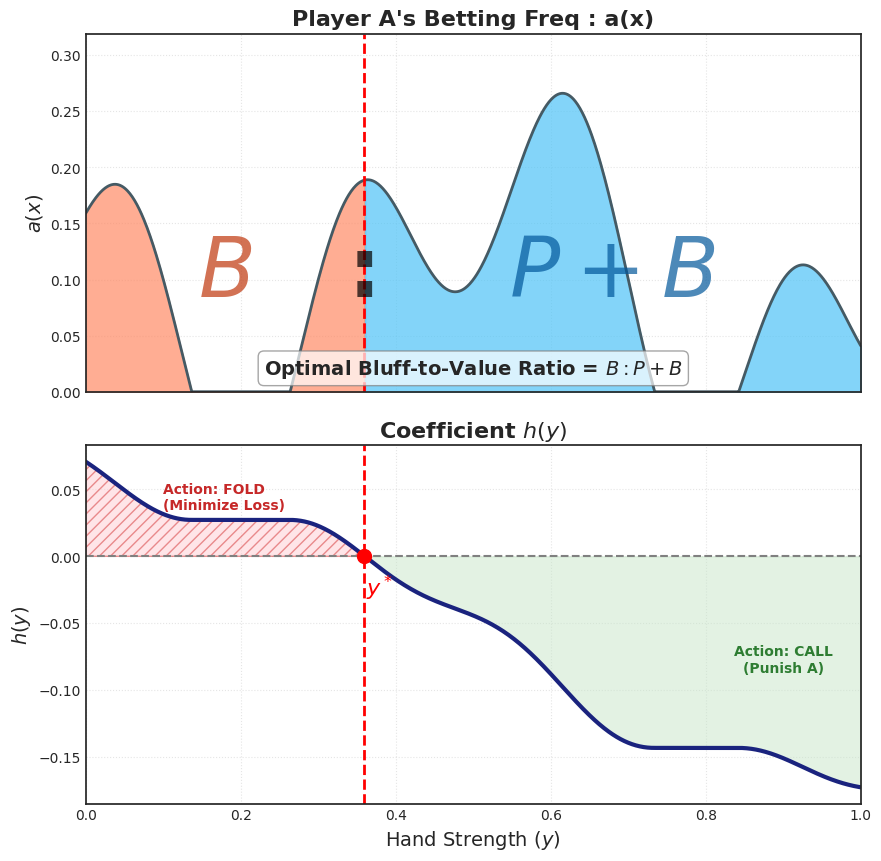

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

# ==========================================
# 參數與數據準備 (維持不變)
# ==========================================
plt.style.use('seaborn-v0_8-white')

# 定義 x, y 軸 (0 到 1)
t = np.linspace(0, 1, 1000)
dt = t[1] - t[0]

# 模擬參數
P = 1.0  # Pot Size
B = 0.7  # Bet Size

# 定義 a(x): Player A 的下注頻率 (使用你指定的新函數)
np.random.seed(10)
a_x = 0.1 + 0.2 * np.sin(2 * np.pi * t + 0.3) * np.cos(5 * np.pi * t)
a_x = np.clip(a_x, 0, 1)

# 計算 h(y) for Player B
total_integral = np.sum(a_x) * dt
cum_integral = np.cumsum(a_x) * dt

term_positive = B * (total_integral - cum_integral)
term_negative = (P + B) * cum_integral
h_y = term_positive - term_negative

# 找出無差異點 y* (h(y) = 0)
cross_indices = np.where(np.diff(np.sign(h_y)))[0]
y_star = t[cross_indices[0]] if len(cross_indices) > 0 else 0.5

# ==========================================
# 繪圖設置
# ==========================================
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.15)

# ==============================================================================
# 【交換位置】現在上方是 Subplot 1: a(x) - Player A's Range Structure (原本在下方)
# ==============================================================================
# 使用 gs[0] 放在上方
ax_a = fig.add_subplot(gs[0])
ax_a.plot(t, a_x, color='#455A64', linewidth=2, label='$a(x)$')

# 區域 1: 左側 (Bluffs)
ax_a.fill_between(t, 0, a_x, where=(t <= y_star),
                 color='#FF8A65', alpha=0.7)

# 區域 2: 右側 (Value)
ax_a.fill_between(t, 0, a_x, where=(t > y_star),
                 color='#4FC3F7', alpha=0.7)

# 標註 y* 切線
ax_a.axvline(y_star, color='red', linestyle='--', linewidth=2)

# ★★★ 重點修改：只顯示巨大的 B : P+B ★★★
# 左邊：寫上巨大的 B
text_y_pos = max(a_x) * 0.4
ax_a.text(y_star / 2, text_y_pos, r"$B$",
         fontsize=60, ha='center', va='center',
         color='#BF360C', fontweight='bold', alpha=0.7, zorder=10)

# 中間：寫上冒號
ax_a.text(y_star, text_y_pos, r":",
         fontsize=60, ha='center', va='center',
         color='black', fontweight='bold', alpha=0.7, zorder=10)

# 右邊：寫上巨大的 P + B
ax_a.text(y_star + (1 - y_star) / 2, text_y_pos, r"$P + B$",
         fontsize=60, ha='center', va='center',
         color='#01579B', fontweight='bold', alpha=0.7, zorder=10)

# 底部說明文字
ratio_text = f"Optimal Bluff-to-Value Ratio = $B : P+B$"
ax_a.text(0.5, 0.05, ratio_text, transform=ax_a.transAxes,
         ha='center', fontsize=14, fontweight='bold',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray', boxstyle='round'))

# 設定標籤與標題
# ax_a.set_xlabel(r"Hand Strength ($x$)", fontsize=14) # 上方圖不顯示 X 軸標籤
ax_a.set_ylabel(r"$a(x)$", fontsize=14)
ax_a.set_title(r"Player A's Betting Freq : a(x)", fontsize=16, fontweight='bold')
ax_a.set_xlim(0, 1)
ax_a.set_ylim(0, max(a_x) * 1.2)
ax_a.grid(True, linestyle=':', alpha=0.5)
ax_a.set_xticklabels([]) # 隱藏上方圖的 X 軸刻度

# ==============================================================================
# 【交換位置】現在下方是 Subplot 2: h(y) - Player B's Decision (原本在上方)
# ==============================================================================
# 使用 gs[1] 放在下方
ax_h = fig.add_subplot(gs[1])
ax_h.plot(t, h_y, color='#1A237E', linewidth=3, label='$h(y)$')
ax_h.axhline(0, color='gray', linestyle='--', linewidth=1.5)

# 填色區塊
ax_h.fill_between(t, h_y, 0, where=(h_y >= 0),
                 color='#FFCDD2', alpha=0.5, hatch='///', edgecolor='#D32F2F')
ax_h.text(0.1, max(h_y) * 0.5, "Action: FOLD\n(Minimize Loss)", color='#C62828', fontweight='bold')

ax_h.fill_between(t, h_y, 0, where=(h_y < 0),
                 color='#C8E6C9', alpha=0.5)
ax_h.text(0.9, min(h_y) * 0.5, "Action: CALL\n(Punish A)", color='#2E7D32', fontweight='bold', ha='center')

# 標註 y*
ax_h.axvline(y_star, color='red', linestyle='--', linewidth=2)
ax_h.text(y_star+0.02, ax_h.get_ylim()[1]*(-0.15), r"$y^*$",
         fontsize=16, color='red', ha='center', va='top', fontweight='bold')
ax_h.plot(y_star, 0, 'ro', markersize=10, zorder=5)

# 設定標籤與標題
ax_h.set_xlabel(r"Hand Strength ($y$)", fontsize=14) # 下方圖顯示 X 軸標籤
ax_h.set_ylabel(r"$h(y)$", fontsize=14)
ax_h.set_title(r"Coefficient $h(y)$", fontsize=16, fontweight='bold')
ax_h.set_xlim(0, 1)
ax_h.grid(True, linestyle=':', alpha=0.5)
# ax_h.set_xticklabels([]) # 下方圖需要顯示刻度，所以註解掉這行

# ==========================================
# 存檔與顯示
# ==========================================
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/bluff_value_ratio_2.png', dpi=300, bbox_inches='tight')
plt.show()

<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_10479/1240054174.py:37: SyntaxWarning: invalid escape sequence '\l'
  ax.text(centroid_x, centroid_y, '$D$\n$y^* \leq x \leq y \leq 1$', ha='center', va='center', fontsize=12, fontweight='bold')


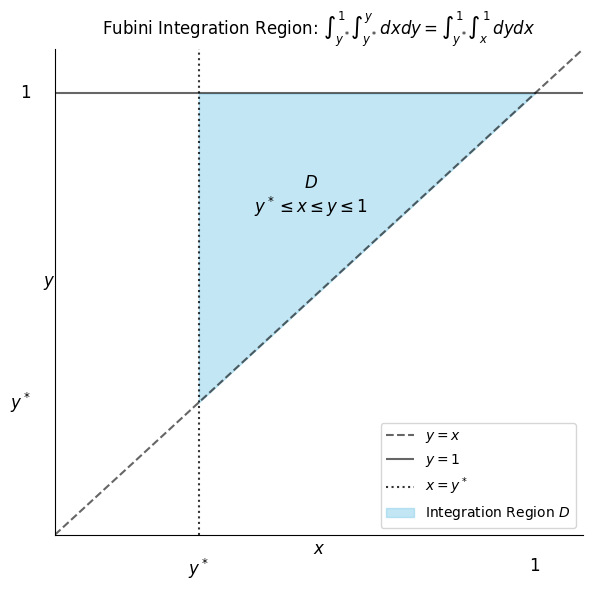

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os 

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 6))

# Define y* (arbitrary value for visualization)
y_star = 0.3

# Define the boundaries
x_vals = np.linspace(0, 1.2, 200)

# Plot the main lines defining the region
ax.plot(x_vals, x_vals, 'k--', alpha=0.6, label='$y=x$')  # Diagonal y=x
ax.hlines(1, 0, 1.2, colors='k', linestyles='-', alpha=0.6, label='$y=1$') # y=1
ax.vlines(y_star, 0, 1.2, colors='k', linestyles=':', alpha=0.8, label='$x=y^*$') # x=y*

# Fill the integration region
# The region is defined by: y* <= x <= 1 and x <= y <= 1
# This is equivalent to: y* <= y <= 1 and y* <= x <= y
x_fill = np.linspace(y_star, 1, 100)
y_lower = x_fill  # y >= x
y_upper = np.ones_like(x_fill) # y <= 1

ax.fill_between(x_fill, y_lower, y_upper, color='skyblue', alpha=0.5, label='Integration Region $D$')

# Annotations
ax.text(y_star, -0.05, '$y^*$', ha='center', va='top', fontsize=12)
ax.text(1, -0.05, '$1$', ha='center', va='top', fontsize=12)
ax.text(-0.05, y_star, '$y^*$', ha='right', va='center', fontsize=12)
ax.text(-0.05, 1, '$1$', ha='right', va='center', fontsize=12)

# Labeling the region
centroid_x = (y_star + 1 + y_star) / 3
centroid_y = (y_star + 1 + 1) / 3
ax.text(centroid_x, centroid_y, '$D$\n$y^* \leq x \leq y \leq 1$', ha='center', va='center', fontsize=12, fontweight='bold')

# Set limits and labels
ax.set_xlim(0, 1.1)
ax.set_ylim(0, 1.1)
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12, rotation=0)
ax.set_xticks([]) # Remove default ticks to use custom text labels
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add title
ax.set_title(r'Fubini Integration Region: $\int_{y^*}^1 \int_{y^*}^y \, dx dy = \int_{y^*}^1 \int_x^1 \, dy dx$')
ax.legend(loc='lower right')

# Save plot
plt.tight_layout()
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/fubini_region.png', dpi=300, bbox_inches='tight')
plt.show()


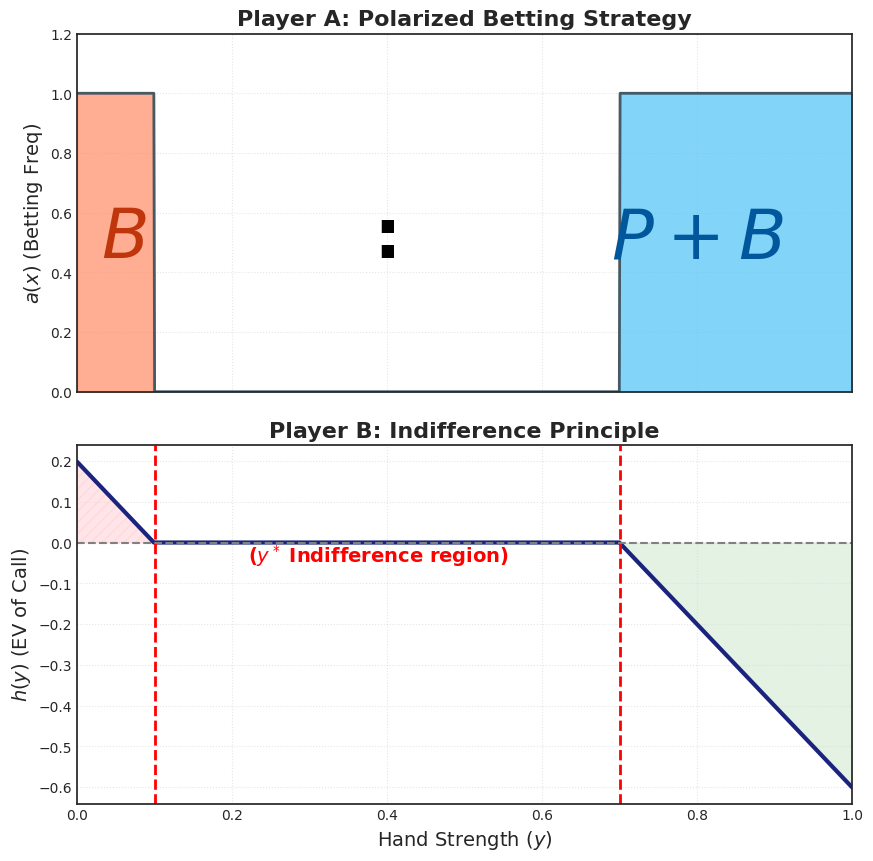

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os

# ==========================================
# 參數與數據準備 (調整為 Polarized Range)
# ==========================================
plt.style.use('seaborn-v0_8-white')

t = np.linspace(0, 1, 1000)
dt = t[1] - t[0]

P = 1.0  # Pot Size
B = 0.5  # Bet Size 

tau = (B) / (P+2*B) * (3*P+2*B) / (2*P+B)
upperbound = (1 + tau) / 2
lowerbound = (1 - tau) / 2 * B / (P + B)
# 定義兩極化範圍 a(x): 只有最差的牌 (Bluff) 和 最強的牌 (Value) 下注
# 這裡設置 0~0.1 為詐唬，0.7~1.0 為價值
a_x = np.zeros_like(t)
a_x[(t <= lowerbound)] = 1.0        # Bluffs
a_x[(t >= upperbound)] = 1.0        # Value
# 添加一點平滑感
# a_x = np.convolve(a_x, np.ones(20)/20, mode='same') 

# 計算 h(y) for Player B
total_integral = np.sum(a_x) * dt
cum_integral = np.cumsum(a_x) * dt
term_positive = B * (total_integral - cum_integral)
term_negative = (P + B) * cum_integral
h_y = term_positive - term_negative

# 找出無差異點 y*
cross_indices = np.where(np.diff(np.sign(h_y)))[0]
y_star = t[cross_indices[0]] if len(cross_indices) > 0 else 0.5

# ==========================================
# 繪圖設置
# ==========================================
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.15)

# Subplot 1: a(x) - Polarized Range Structure
ax_a = fig.add_subplot(gs[0])
ax_a.plot(t, a_x, color='#455A64', linewidth=2)

# 區域填充
ax_a.fill_between(t, 0, a_x, where=(t <= y_star), color='#FF8A65', alpha=0.7, label='Bluff')
ax_a.fill_between(t, 0, a_x, where=(t > y_star), color='#4FC3F7', alpha=0.7, label='Value')
# ax_a.axvline(y_star, color='red', linestyle='--', linewidth=2)

# 標註巨大的 B : P+B
text_y_pos = 0.45
ax_a.text(0.06, text_y_pos, r"$B$", fontsize=50, ha='center', color='#BF360C', fontweight='bold')
ax_a.text(0.4, text_y_pos, r":", fontsize=50, ha='center', color='black', fontweight='bold')
ax_a.text(0.8, text_y_pos, r"$P + B$", fontsize=50, ha='center', color='#01579B', fontweight='bold')

ax_a.set_ylabel(r"$a(x)$ (Betting Freq)", fontsize=14)
ax_a.set_title(r"Player A: Polarized Betting Strategy", fontsize=16, fontweight='bold')
ax_a.set_xlim(0, 1)
ax_a.set_ylim(0, 1.2)
ax_a.grid(True, linestyle=':', alpha=0.5)
ax_a.set_xticklabels([])

# Subplot 2: h(y) - Player B's Decision
ax_h = fig.add_subplot(gs[1])
ax_h.plot(t, h_y, color='#1A237E', linewidth=3)
ax_h.axhline(0, color='gray', linestyle='--', linewidth=1.5)

ax_h.fill_between(t, h_y, 0, where=(h_y >= 0), color='#FFCDD2', alpha=0.5, hatch='///')
ax_h.fill_between(t, h_y, 0, where=(h_y < 0), color='#C8E6C9', alpha=0.5)

ax_h.axvline(lowerbound, color='red', linestyle='--', linewidth=2)
ax_h.axvline(upperbound, color='red', linestyle='--', linewidth=2)

ax_h.text(lowerbound*0.8+upperbound*0.2, ax_h.get_ylim()[1]*(-0.2), r"($y^*$ Indifference region)", 
          fontsize=14, color='red', fontweight='bold')

ax_h.set_xlabel(r"Hand Strength ($y$)", fontsize=14)
ax_h.set_ylabel(r"$h(y)$ (EV of Call)", fontsize=14)
ax_h.set_title(r"Player B: Indifference Principle", fontsize=16, fontweight='bold')
ax_h.set_xlim(0, 1)
ax_h.grid(True, linestyle=':', alpha=0.5)

# ==========================================
# 存檔
# ==========================================
os.makedirs('images/lesson_6', exist_ok=True)
plt.savefig('images/lesson_6/polarized_range_plot.png', dpi=300, bbox_inches='tight')
plt.show()